# Pipeline

This book will take a look at the pipeline flow of the lane detection algorithm.

## Imports

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from src.calibration import Calibration
from src.transform import Transform
from src.threshold import Threshold
from src.lines import Lines

## Pipelines Summary

Here are the following steps in our pipeline:

1) Initialize classes
2) Undistort image using calibration parameters
3) Transform region of interest in image to bird's-eye view
4) Apply binary thresholding to image for line fitting
5) Fit and draw curves for the lane lines
6) Transform image back to front view
7) Add lane lines image to original image

The following image will be the test image used for the remainder of the book.

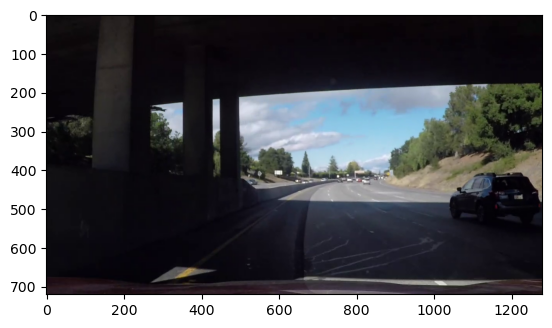

In [2]:
orig_img = cv2.imread('output_media/debug/problem_frames/132_frame.png')
orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)
plt.imshow(orig_img)

## Initialize Classes

First we need to initialize the classes in each helper script in order to perform the operations.

In [3]:
calibration = Calibration('camera_cal/', (9, 6))
transform = Transform()
threshold = Threshold()
lines = Lines()

## Calibrate Image

The first image manipulation technique used is to apply a distortion reduction by using camera calibration parameters. Below, the left image is the original image and the right image is the undistorted version.

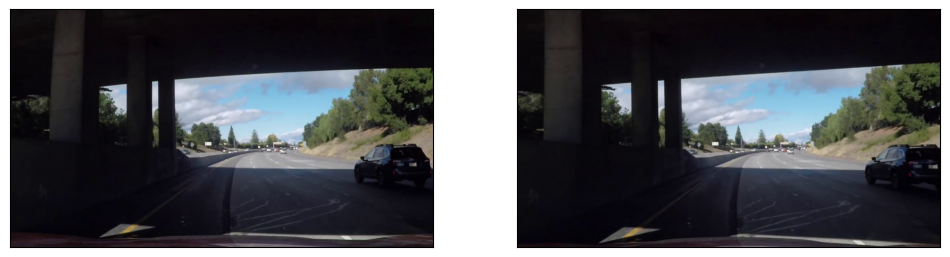

In [4]:
cal_img = calibration.undistort(orig_img)

fig, axs = plt.subplots(1, 2)
axs[0].imshow(orig_img)
axs[1].imshow(cal_img)
fig.set_figwidth(12)

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

## Transform Image

Now that the distortion in the image has been reduced, we want ot get the bird's-eye view of the lane ahead of the vehicle.

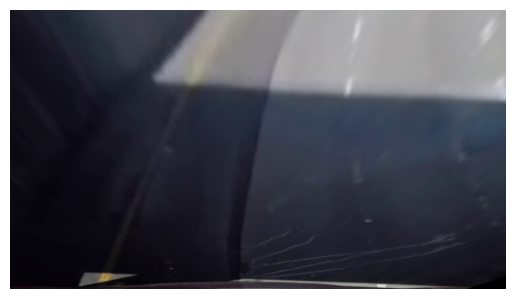

In [5]:
bev_img = transform.orig_to_bev(cal_img)
plt.axis('off')
plt.imshow(bev_img)

## Thresholding Image

From the bird's-eye view, we can apply a binary threshold to seperate the lane markers from the road.

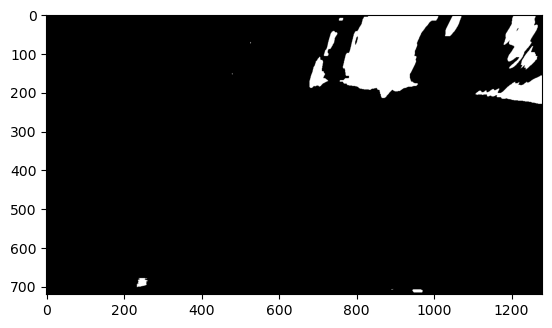

In [6]:
bev_img = cv2.cvtColor(bev_img, cv2.COLOR_RGB2BGR)
thresh_img = threshold.apply_threshold(bev_img, (210, 255), (20, 30))
# plt.axis('off')
plt.imshow(thresh_img, cmap='gray')

## Fitting Lines

The threshold image gives us the locations of the hot pixels we care about. We can take the coordinates of the left and right lane line pixels and fit a curve to each one.

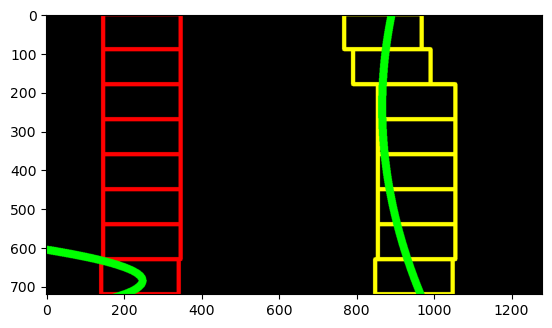

In [7]:
lines_img = lines.sliding_window(thresh_img, True)
# plt.axis('off')
plt.imshow(lines_img)

## Transform to Front View

Once we have the lane lines, the image needs to be transformed back into the vehicle front-view perspective.

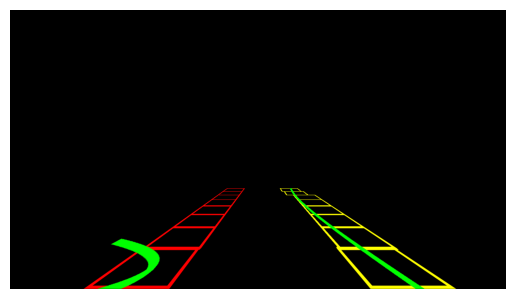

In [8]:
trans_lines_img = transform.bev_to_orig(lines_img)
plt.axis('off')
plt.imshow(trans_lines_img)

## Adding the Lines to the Original Image

After the lane lines have been transformed, they need to be added to the original image.

In [9]:
orig_img.dtype

dtype('uint8')

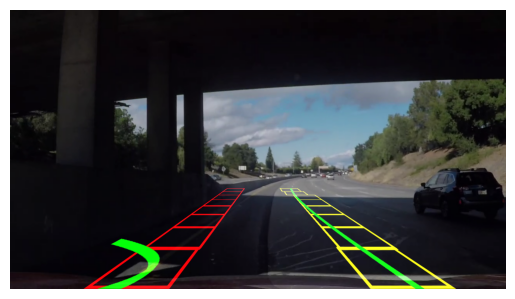

In [10]:
output_img = cv2.addWeighted(orig_img, 0.8, trans_lines_img, 1.0, 0.0)
plt.axis('off')
plt.imshow(output_img)